# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
from sklearn.model_selection import GridSearchCV
import joblib
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')


# **1. EDA**

1.1 Membaca Dataset

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

1.2 Menampilkan 5 baris pertama dataset

In [ ]:
print("===== 5 Baris Pertama =====")
display(df.head())


===== 5 Baris Pertama =====


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


1.3 Menampilkan info dataset

In [ ]:
print("===== INFO DATASET =====")
df.info()

===== INFO DATASET =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling 

1.4 Menampilkan statistik deskriptif dataset

In [ ]:
print("===== STATISTIK DESKRIPTIF =====")
display(df.describe(include='all'))

===== STATISTIK DESKRIPTIF =====


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


1.5 Identifikasi Missing Value

In [ ]:

# Mengubah TotalCharges ke numerik dulu agar missing terdeteksi
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


===== Persentase Missing Value =====
customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64


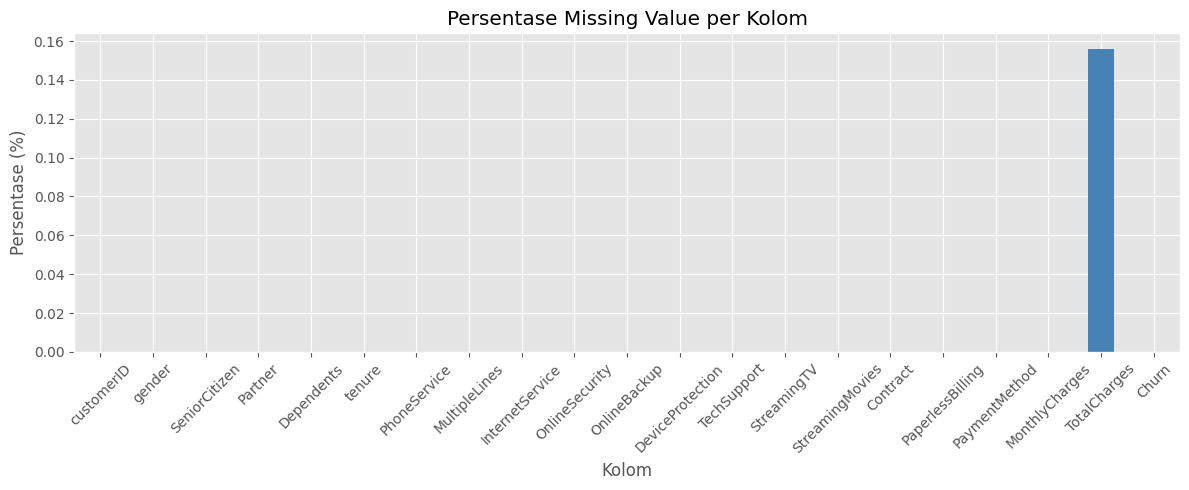

In [ ]:

missing_percent = df.isnull().mean() * 100
print("===== Persentase Missing Value =====")
print(missing_percent)

plt.figure(figsize=(12, 5))
missing_percent.plot(kind='bar', color='steelblue')
plt.title("Persentase Missing Value per Kolom")
plt.ylabel("Persentase (%)")
plt.xlabel("Kolom")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1.6 Visualisasi variabel target (Churn)

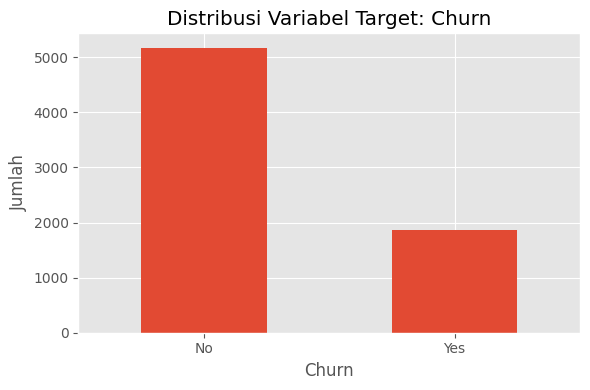

In [ ]:
# Visualisasi target
plt.figure(figsize=(6, 4))
df['Churn'].value_counts().plot(kind='bar')
plt.title("Distribusi Variabel Target: Churn")
plt.xlabel("Churn")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

1.7 Analisis korelasi (Numerik)

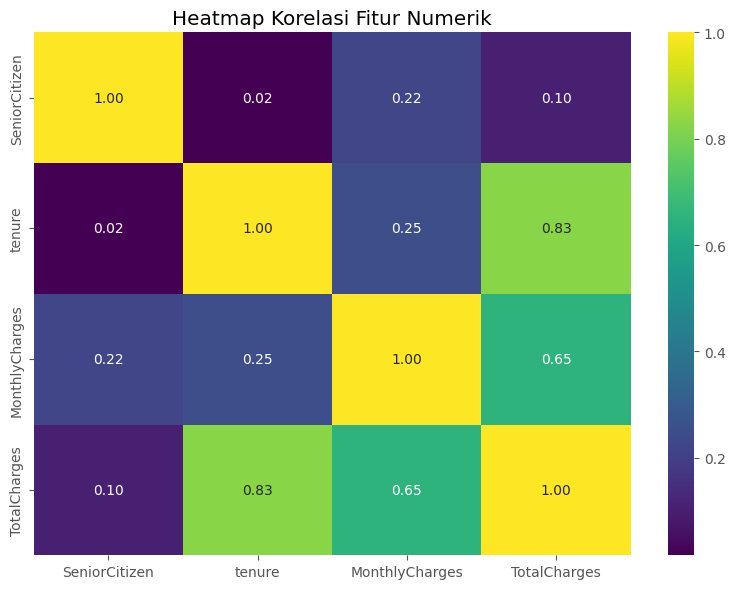

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.tight_layout()
plt.show()

# **2. DIRECT MODELING (TANPA PREPOCESSING & HYPERPARAMETER)**

2.1 Menetapkan variabel target & fitur

In [ ]:

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# lalu baru buat X dan y
y = df['Churn'].replace({'Yes': 1, 'No': 0})
X = df.drop(columns=['Churn', 'customerID'])
X = pd.get_dummies(X, drop_first=True)

2.2 Train Test split

In [ ]:
# pastikan sudah tidak ada NaN
print(X.isnull().sum().sort_values(ascending=False).head())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
gender_Male       0
dtype: int64


2.3 Membuat 3 model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Model konvensional
model_lr = LogisticRegression(max_iter=1000)

# Model bagging
model_rf = RandomForestClassifier()

# Model voting (LR + SVM + KNN)
model_voting = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('svm', SVC(probability=True)),
        ('knn', KNeighborsClassifier())
    ],
    voting='soft'
)

2.4 Melatih ketiga model

In [ ]:

models = {
    "Logistic Regression": model_lr,
    "Random Forest (Bagging)": model_rf,
    "Voting Classifier": model_voting
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)


Training Logistic Regression...
Training Random Forest (Bagging)...
Training Voting Classifier...


2.5 Evaluasi ketiga model


   Evaluasi Model: Logistic Regression
Accuracy : 0.8034066713981547
Precision: 0.6520376175548589
Recall   : 0.5561497326203209
F1-score : 0.6002886002886003

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



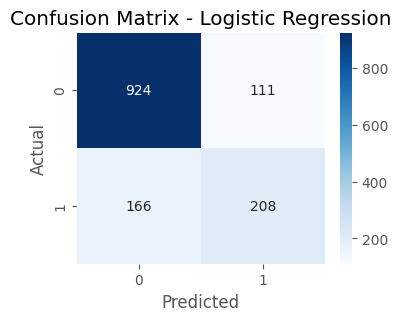


   Evaluasi Model: Random Forest (Bagging)
Accuracy : 0.7842441447835344
Precision: 0.6232394366197183
Recall   : 0.4732620320855615
F1-score : 0.5379939209726444

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.62      0.47      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



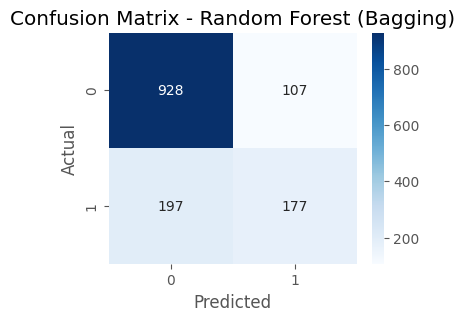


   Evaluasi Model: Voting Classifier
Accuracy : 0.7991483321504613
Precision: 0.6827309236947792
Recall   : 0.45454545454545453
F1-score : 0.5457463884430177

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1035
           1       0.68      0.45      0.55       374

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.78      1409



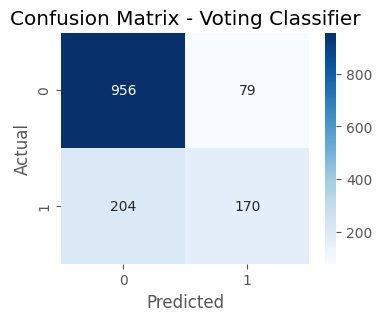

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

for name, model in models.items():
    print("\n==============================")
    print(f"   Evaluasi Model: {name}")
    print("==============================")

    y_pred = model.predict(X_test)

    # Metrics
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# **3. MODELING DENGAN PREPOCESSING**

3.1 Handling Missing Value (TotalCharges)

In [ ]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


3.2 Menghapus data duplikat

In [ ]:
df = df.drop_duplicates()

3.3 Handling outliers (IQR) untuk numerik

In [ ]:
num_cols_outlier = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in num_cols_outlier:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

 3.4 Drop kolom tidak relevan

In [ ]:
df = df.drop(columns=['customerID'])

3.5 Menetapkan target dan fitur

In [ ]:
y = df['Churn'].replace({'Yes': 1, 'No': 0})
X = df.drop(columns=['Churn'])

3.6 Identifikasi tipe kolom

In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

3.7 Preprocessor: scaling + one hot

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# **4. MODELLING DENGAN PREPOCESSING & HYPERPARAMETER**

4.1 Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


4.2 Membuat tiga model

In [ ]:
model_lr = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

model_rf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

model_voting = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000)),
            ('svm', SVC(probability=True)),
            ('knn', KNeighborsClassifier())
        ],
        voting='soft'
    ))
])

base_models = {
    "Logistic Regression": model_lr,
    "Random Forest (Bagging)": model_rf,
    "Voting Classifier": model_voting
}

4.3 Melatih ketiga  model & evaluasi model

Training Logistic Regression...

 Evaluasi Model: Logistic Regression
Accuracy : 0.8055358410220014
Precision: 0.6572327044025157
Recall   : 0.5588235294117647
F1-score : 0.6040462427745664

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



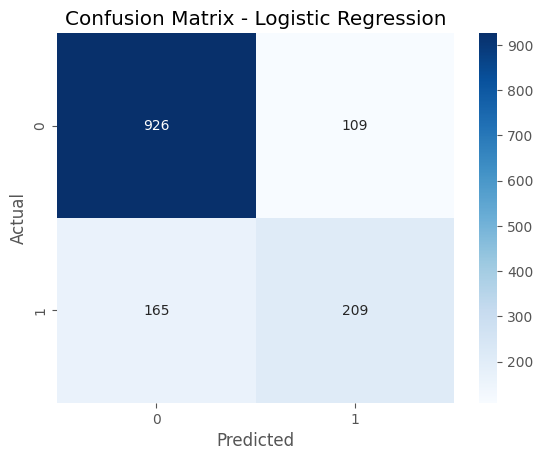

Training Random Forest (Bagging)...

 Evaluasi Model: Random Forest (Bagging)
Accuracy : 0.7856635911994322
Precision: 0.6216216216216216
Recall   : 0.4919786096256685
F1-score : 0.5492537313432836

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



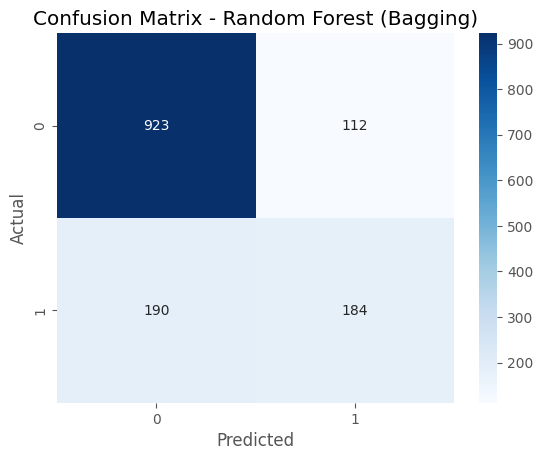

Training Voting Classifier...

 Evaluasi Model: Voting Classifier
Accuracy : 0.8005677785663591
Precision: 0.6555183946488294
Recall   : 0.5240641711229946
F1-score : 0.5824665676077266

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



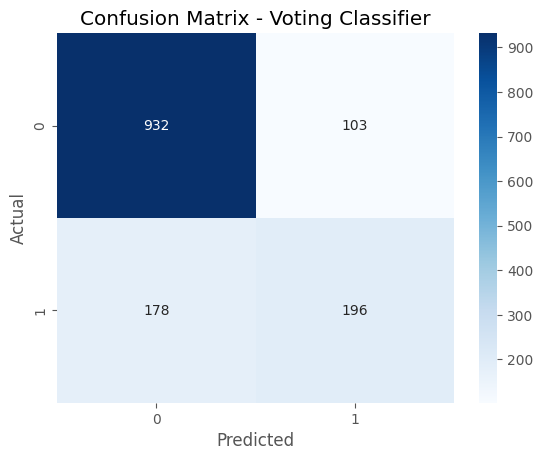

In [ ]:
for name, model in base_models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print("\n==============================")
    print(f" Evaluasi Model: {name}")
    print("==============================")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# **5. HYPERPARAMETER TUNING & MENYIMPAN BEST MODEL**

5.1 Mendefinisikan pipeline khusus untuk tuning

In [ ]:
pipeline_rf = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

pipeline_svc = Pipeline([
    ('preprocess', preprocessor),
    ('model', SVC(probability=True, random_state=42))
])

pipeline_knn = Pipeline([
    ('preprocess', preprocessor),
    ('model', KNeighborsClassifier())
])

5.2 Grid parameter

In [ ]:
param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}

param_grid_svc = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['rbf', 'linear'],
    'model__gamma': ['scale', 'auto']
}

param_grid_knn = {
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance']
}

searches = {
    "RandomForest": (pipeline_rf, param_grid_rf),
    "SVM": (pipeline_svc, param_grid_svc),
    "KNN": (pipeline_knn, param_grid_knn)
}

best_pipelines = {}
best_scores = {}

5.3 GridSearchCV untuk setiap model

In [ ]:
for name, (pipeline, param_grid) in searches.items():
    print(f"\n=== TUNING: {name} ===")
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='f1',
        cv=5,
        n_jobs=-1,
        verbose=0
    )
    grid.fit(X_train, y_train)
    print("Best CV f1-score:", grid.best_score_)
    print("Best params:", grid.best_params_)

    best_pipelines[name] = grid.best_estimator_
    best_scores[name] = grid.best_score_


=== TUNING: RandomForest ===
Best CV f1-score: 0.565620123094772
Best params: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 200}

=== TUNING: SVM ===
Best CV f1-score: 0.5870170262379275
Best params: {'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'linear'}

=== TUNING: KNN ===
Best CV f1-score: 0.5664943952509451
Best params: {'model__n_neighbors': 7, 'model__weights': 'uniform'}



5.4 Evaluasi semua best pipeline di test set

In [ ]:
def evaluate(pipe, X_test, y_test, model_name):
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    print(f"\n--- RESULTS: {model_name} ---")
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-score :", f1)
    print("\nClassification Report:\n",
          classification_report(y_test, y_pred, zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    return f1

test_scores = {}
for name, pipe in best_pipelines.items():
    test_scores[name] = evaluate(pipe, X_test, y_test, name)

print("\nSkor F1 di test set:", test_scores)


--- RESULTS: RandomForest ---
Accuracy : 0.8005677785663591
Precision: 0.6576271186440678
Recall   : 0.5187165775401069
F1-score : 0.5799701046337817

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
 [[934 101]
 [180 194]]

--- RESULTS: SVM ---
Accuracy : 0.7877927608232789
Precision: 0.616822429906542
Recall   : 0.5294117647058824
F1-score : 0.5697841726618705

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.62      0.53      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.71      1409
weighted avg     

5.5 Pilih model terbaik dan simpan untuk deploy

In [ ]:

best_model_name = max(test_scores, key=test_scores.get)
best_model = best_pipelines[best_model_name]

print(f"\nBEST MODEL UNTUK DEPLOY: {best_model_name}")
joblib.dump(best_model, 'telco_churn_best_model.pkl')
print("Model tersimpan sebagai telco_churn_best_model.pkl")



BEST MODEL UNTUK DEPLOY: RandomForest
Model tersimpan sebagai telco_churn_best_model.pkl


In [37]:
import sklearn
print(sklearn.__version__)


1.6.1
